## 1차원 데이터
- 평균값(기댓값), 표본분산, 불편분산(ddof=1), 표준편차
- 표본순산은 표본의 평균을 사용해서 분산을 계산한 값으로 분산을 과소 추정하는 경향이 있으며 그 경향을 없애기 위한것이 불편분산이다 따라서 표본분산보다 조금 큰값이 된다.
- 표준화 : 평균값이 큰 변수와 작은 변수가 섞여잇으면 다루기 어려우므로 표준화로 데이터를 비교하기 쉽게 한다.
- 최댓값, 최솟값, 중앙값, 사분위수
- 표본분산과 비편향 분산
 - 분산은 표본 분산과 불편분산(unbiased variance)의 두 종류가 존재
 - 표본 분산은 표본에서 계산된 분산이며 모집단에 비해 표본수가 적을 때는 표본 분산이 모분산보다 적어진다.
 - 즉 표본 분산이 모집단 분산에 맞춰서 동일하게 보정된 것을 비편향 분산이라 한다.
 - 통계학에서는 이 비편향분산을 사용하는 경우가 많다.
 - 불편분산은 n대신 n-1로 나누어 구할 수 있다.
 
[표본분산이 분산을 과소 평가하는 이유]
 - 호수안에 물고기가 7마리가 있다. 몸길이 {1,2,3,4,5,6,7}, 모평균 4, 샘플링1 {1,2,3}, 표본평균 2, 샘플링2 {5,6,7}, 표본평균 6
 - 이때 분산은 모평균을 모르기때문에 표본평균과의 거리를 계산하며 분산을 과소 평가하게된다.
 - 표본 분산보다 조금 더 큰 값이 되도록 보정하기 위하여 N대신 N-1로 나누어 불편 분산을 구할 수 있다.

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df= pd.read_csv('./data/ch2_scores_em.csv')
df.head()

,student number,english,mathematics
0,1,42,65
1,2,69,80
2,3,56,63
3,4,41,63
4,5,57,76


In [8]:
scores = np.array(df.english)[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [9]:
score_df = pd.DataFrame({'score' : scores}
             ,index=pd.Index(['A','B','C','D','E','F','G','H','I','J']
            ,name = 'student'))

In [10]:
score_df.describe()

,score
count,10.000000
mean,55.000000
std,9.775252
min,41.000000
25%,48.250000
50%,56.500000
75%,63.250000
max,69.000000


In [11]:
print(sum(scores)/len(scores))
print(np.mean(scores))
score_df.mean()

55.0
55.0


score    55.0
dtype: float64

In [12]:
# 중앙감
sorted_scores = np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69], dtype=int64)

In [13]:
n = len(sorted_scores)
if n%2==0:
    m0 = sorted_scores[n//2-1]
    m1 = sorted_scores[n//2]
    median = (m0+m1)/2
elif n%2==1:
    median = sorted_scores[(n+1)//2-1]
median


56.5

In [14]:
print(np.median(scores))
score_df.median()

56.5


score    56.5
dtype: float64

In [15]:
# 최빈값
pd.Series([1,1,1,2,2,3]).mode()

0    1
dtype: int64

In [16]:
# 분산과 표준편차
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [17]:
# 편차
mean = np.mean(scores)
print(mean)
deviation = scores - mean
deviation

55.0


array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [18]:
deviation.sum()
deviation.mean()

0.0

In [19]:
# Q. 20개 원소로 구성되는 배열을 만든 후 평균, 편차 및 편차의 합을 구하세요.
np.random.seed(0)
arr = np.arange(20)+np.random.randn(20)*10
arr = arr.astype(int)
print(arr,'\n')
print(arr.mean(),'\n')
print(arr-arr.mean(),'\n')
print((arr-arr.mean()).sum())

[17  5 11 25 22 -4 15  5  6 13 11 25 19 14 18 18 30 14 21 10] 

14.75 

[  2.25  -9.75  -3.75  10.25   7.25 -18.75   0.25  -9.75  -8.75  -1.75
  -3.75  10.25   4.25  -0.75   3.25   3.25  15.25  -0.75   6.25  -4.75] 

0.0


분산
- Numpy 와 Pandas는 서로 다른 분산을 기본으로 설정하여 계산
 * Numpy는 표본분산, Pandas는 불편분산
 * Pandas에서 표본분산을 계산하려면 var 메소드의 인수를 ddof=0이라고 설정, 불편분산은 ddof=1일 때 해당 됨.

In [20]:
np.mean(deviation**2)

86.0

In [21]:
np.var(scores)

86.0

In [22]:
score_df.var()

score    95.555556
dtype: float64

In [23]:
score_df.var(ddof=0)

score    86.0
dtype: float64

In [24]:
df = score_df.copy()
df['deviation']=deviation
df['squrare of deviation']=deviation**2
df

,score,deviation,squrare of deviation
student,,,
A,42,-13.0,169.0
B,69,14.0,196.0
C,56,1.0,1.0
D,41,-14.0,196.0
E,57,2.0,4.0
F,48,-7.0,49.0
G,65,10.0,100.0
H,49,-6.0,36.0
I,65,10.0,100.0


In [25]:
df.mean()

score                   55.0
deviation                0.0
squrare of deviation    86.0
dtype: float64

In [26]:
# 표준편차
np.sqrt(np.var(scores,ddof=0))

9.273618495495704

In [27]:
np.std(scores,ddof=0)

9.273618495495704

In [28]:
df.std()

score                    9.775252
deviation                9.775252
squrare of deviation    78.335461
dtype: float64

In [29]:
df.std(ddof=0)

score                    9.273618
deviation                9.273618
squrare of deviation    74.315543
dtype: float64

In [30]:
# 범위와 4분위수 범위
np.max(scores) - np.min(scores)

28

In [31]:
scores_Q1 = np.percentile(scores,25)
scores_Q3 = np.percentile(scores,75)
scores_IQR = scores_Q3-scores_Q1
scores_IQR

15.0

In [32]:
# 요약 통계표
pd.Series(scores).describe()

count    10.000000
mean     55.000000
std       9.775252
min      41.000000
25%      48.250000
50%      56.500000
75%      63.250000
max      69.000000
dtype: float64

In [33]:
# 데이터의 정규화

print(f'평균: {scores.mean()}, 표준편차: {scores.std().round(4)}')

평균: 55.0, 표준편차: 9.2736


In [34]:
# 표준화 (평균이 0 표준편차가 1)
z = (scores - np.mean(scores))/np.std(scores)
z

array([-1.40182605,  1.50965882,  0.10783277, -1.50965882,  0.21566555,
       -0.75482941,  1.07832773, -0.64699664,  1.07832773,  0.32349832])

In [35]:
np.mean(z),np.std(z)

(-1.6653345369377347e-17, 0.9999999999999999)

In [36]:
z = 50 + 10 * (scores - np.mean(scores))/np.std(scores)
z

array([35.98173948, 65.09658825, 51.07832773, 34.90341175, 52.15665546,
       42.45170588, 60.78327732, 43.53003361, 60.78327732, 53.2349832 ])

In [37]:
score_df['deviation_value']=z

In [38]:
score_df

,score,deviation_value
student,,
A,42,35.981739
B,69,65.096588
C,56,51.078328
D,41,34.903412
E,57,52.156655
F,48,42.451706
G,65,60.783277
H,49,43.530034
I,65,60.783277


In [39]:
df= pd.read_csv('./data/ch2_scores_em.csv')
eng_scores = np.array(df.english)
pd.Series(eng_scores).describe()

count    50.000000
mean     58.380000
std       9.799813
min      37.000000
25%      54.000000
50%      57.500000
75%      65.000000
max      79.000000
dtype: float64

In [40]:
freq, _ = np.histogram(eng_scores, bins = 10 , range = (1,100))
freq

array([ 0,  0,  0,  2,  8, 16, 20,  4,  0,  0], dtype=int64)

In [41]:
freq_class = [f'{i}~{i+10}' for i in range(0,100,10)]
freq_dist_df = pd.DataFrame({'frequency':freq}, 
                            index = pd.Index(freq_class,
                                             name = "class"))
freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,20
70~80,4
80~90,0


In [42]:
# 계급값 : 각 계급을 대표하는 값으로 계급의 중앙값이 이용됨
class_value = [(i+(i+10))//2 for i in range(0,100,10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [43]:
# 상대도수 : 해당 계급의 데이터의 상대적인 비율
rel_freq = freq / freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.4 , 0.08, 0.  , 0.  ])

In [44]:
# 누적상대도수 : 해당 계급까지의 상대도수 합
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.92, 1.  , 1.  , 1.  ])

In [45]:
freq_dist_df['class value'] = class_value
freq_dist_df['relative frequency'] = rel_freq
freq_dist_df['cumulative relative frequency'] = cum_rel_freq
freq_dist_df

,frequency,class value,relative frequency,cumulative relative frequency
class,,,,
0~10,0,5,0.00,0.00
10~20,0,15,0.00,0.00
20~30,0,25,0.00,0.00
30~40,2,35,0.04,0.04
40~50,8,45,0.16,0.20
50~60,16,55,0.32,0.52
60~70,20,65,0.40,0.92
70~80,4,75,0.08,1.00
80~90,0,85,0.00,1.00


In [46]:
# 최빈값
freq_dist_df.loc[freq_dist_df['frequency'].idxmax(),'class value']

65

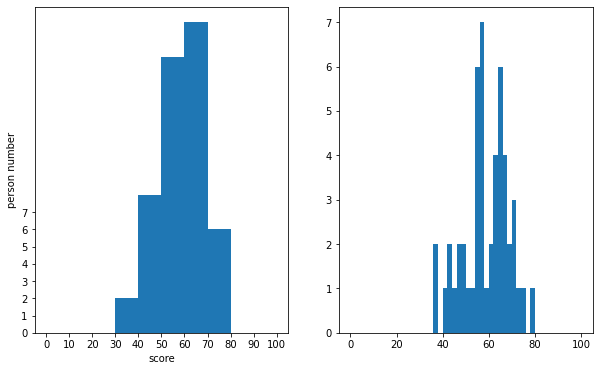

In [146]:
fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
freq , _ , _ = ax1.hist(eng_scores, bins = 10, range=(0,100))
freq , _ , _ = ax2.hist(eng_scores, bins = 50, range=(0,100))
ax1.set_xlabel('score')
ax1.set_ylabel('person number')
ax1.set_xticks(np.linspace(0,100,10+1))
ax1.set_yticks(np.arange(0,freq.max()+1))
plt.show()
plt.close()

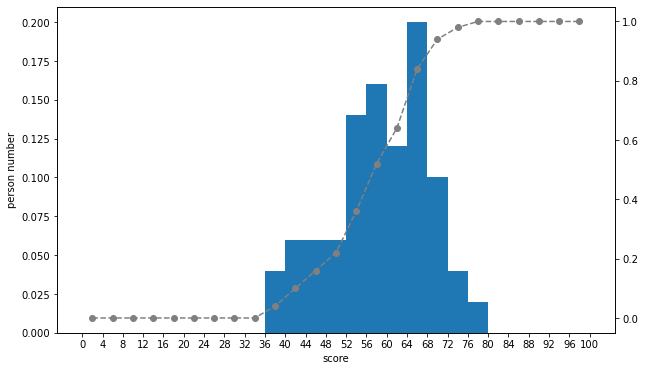

In [48]:
fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(111)
# Y축의 스케일이 다른 그래프를 ax1과 동일한 영역에 생성
ax2 = ax1.twinx()
# 생대도수의 히스토그램으로 하기 위해서는 도수를 데이터의 수로 나눌 필요가 있음
weights = np.ones_like(eng_scores)/ len(eng_scores)
rel_freq , _ , _ = ax1.hist(eng_scores, bins = 25, range=(0,100),weights = weights)

cum_rel_freq = np.cumsum(rel_freq)
class_value = [(i+(i+4))//2 for i in range(0,100,4)]

ax2.plot(class_value,cum_rel_freq, ls='--',marker='o',color='gray')
ax2.grid(visible=False)

ax1.set_xlabel('score')
ax1.set_ylabel('person number')
ax1.set_xticks(np.linspace(0,100,25+1))
plt.show()
plt.close()

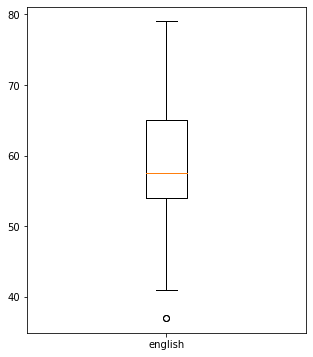

In [49]:
# 상자 그림
fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(111)
ax.boxplot(eng_scores, labels=['english'])
plt.show()
plt.close()

[표본분산이 분산을 과소 평가하는 이슈]

In [50]:
# 표본분산
data = np.array([2,3,3,4,4,4,4,5,5,6])
mu = np.sum(data)/len(data)
print(mu)
s = np.sum((data-mu)**2)/len(data)
s

4.0


1.2

In [51]:
# 불편분산
s1 = np.sum((data-mu)**2)/(len(data)-1)
s1

1.3333333333333333

- 호수안에 물고기가 7마리가 있다. 몸길이 {1,2,3,4,5,6,7}, 모평균 4, 샘플링3마리{1,2,3}, 표본평균 2
- 이때 분산은 모평균을 모르기때문에 표본평균과의 거리를 계산하며 분산을 과소 평가하게된다.
- 표본 분산보다 조금 더 큰 값이 되도록 보정하기 위하여 N대신 N-1로 나누어 불편 분산을 구할 수 있다.

In [52]:
# [과제] 1변향(1차원) 데이터 data에 대하여 평균,표본분산, 불편분산, 표준편차, 최대, 최소, 4분위수, 중앙값을 구하세요.
# 단, 함수 사용하는 경우와 사용하지 않는 경우를 모두 수행
data = np.array([2,3,3,4,4,4,4,5,5,6])

In [53]:
# 함수를 사용
data = np.array([2,3,3,4,4,4,4,5,5,6])
# 평균
print(data.mean(),'\n')
# 표본분산
print(data.var(),'\n')
# 불편분산
print(data.var(ddof=1),'\n')
# 표준편차
print(data.std(),'\n')
# 최댓값
print(data.max(),'\n')
# 최솟값
print(data.min(),'\n')
# Q1
print(np.percentile(data,25),'\n')
# Q3
print(np.percentile(data,75),'\n')
# 중앙값
print(np.median(data),'\n')

4.0 

1.2 

1.3333333333333333 

1.0954451150103321 

6 

2 

3.25 

4.75 

4.0 



In [54]:
# 함수를 사용하지 않는방법

# 평균
me = data.sum()/len(data)
print(me,'\n')
# 표본분산
var1 = np.sum((data-me)**2)/len(data)
print(var1,'\n')
# 불편분산
var2 = np.sum((data-me)**2)/(len(data)-1)
print(var2,'\n')
# 표준편차
std = np.sqrt(var1)
print(std,'\n')
sorted_data=np.sort(data)
# 최댓값
print(sorted_data[len(data)-1],'\n')
# 최솟값
print(sorted_data[0],'\n')
# 중앙값
n = len(data)
if n%2==0:
    median = (data[len(data)//2-1]+data[len(data)//2])/2

elif n%2==1:
    median = data[len(data)//2]

print(median,'\n')

4.0 

1.2 

1.3333333333333333 

1.0954451150103321 

6 

2 

4.0 



# 2차원 데이터


In [55]:
df = pd.read_csv('./data/ch2_scores_em.csv',index_col='student number')

en_scores = np.array(df.english)[:10]
ms_scores = np.array(df.mathematics)[:10]
sdf = pd.DataFrame({'english':en_scores,'mathematics':ms_scores},
                  index = pd.Index(['A','B','C','D','E','F','G','H','I','J'],name='student'))
sdf.head()

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76


In [56]:
# 공분산 두 변수의 편차값을 곱한것
dfc = sdf.copy()
dfc['eng_deviation']=dfc.english-dfc.english.mean()
dfc['math_deviation']=dfc.mathematics-dfc.mathematics.mean()
dfc['product of deciation']=dfc.eng_deviation*dfc.math_deviation
dfc

,english,mathematics,eng_deviation,math_deviation,product of deciation
student,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [57]:
dfc['product of deciation'].mean()

62.8

In [58]:
# ddof 확일 요
cov_mat = np.cov(en_scores,ms_scores, ddof=0)
cov_mat

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [59]:
np.var(en_scores,ddof=0),np.var(ms_scores,ddof=0)

(86.0, 68.44000000000001)

In [60]:
# 상관계수 = 공분산/(a의 표준편차 * b의 표준편차)
np.cov(en_scores,ms_scores,ddof=0)[0,1]/(np.std(en_scores)*np.std(ms_scores))

0.8185692341186713

In [61]:
np.corrcoef(en_scores,ms_scores)

array([[1.        , 0.81856923],
       [0.81856923, 1.        ]])

In [62]:
dfc[['english','mathematics']].corr()

,english,mathematics
english,1.000000,0.818569
mathematics,0.818569,1.000000


In [63]:
# [과제] 10행 2열 2차원 배열을 생성하고 두 열간의 공분산 및 상관계수를 구하세요(단, numpy, pandas 두가지 방식으로 모두 수행)
np.random.seed(0)
arr = np.random.randint(20,size=(10,2))
print(arr,'\n')
# 공분산
print(np.cov(arr[:,0],arr[:,1],ddof=0),'\n')
# 상관계수
print(np.cov(arr[:,0],arr[:,1],ddof=0)[0,1]/(np.std(arr[:,0])*np.std(arr[:,1])))

[[12 15]
 [ 0  3]
 [ 3  7]
 [ 9 19]
 [18  4]
 [ 6 12]
 [ 1  6]
 [ 7 14]
 [17  5]
 [13  8]] 

[[36.24  0.92]
 [ 0.92 26.01]] 

0.029965639933837683


In [64]:
df = pd.DataFrame(arr,columns=['A','B'])
df.corr()

,A,B
A,1.000000,0.029966
B,0.029966,1.000000


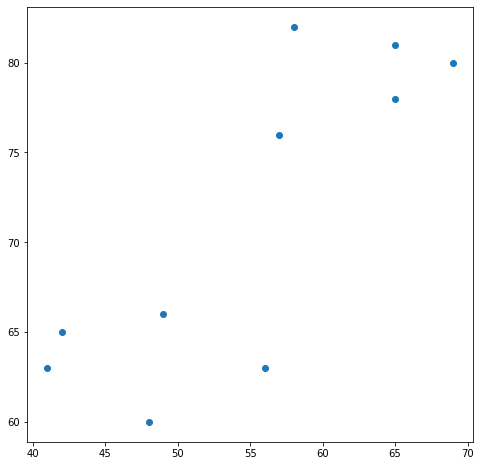

In [65]:
# 산점도

df2 = dfc[['english','mathematics']]
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.scatter(df2.english,df2.mathematics)
plt.show()
plt.close()

다항곡선 회귀분석

기본문법 : p = polyfix(x,y,n)


https://qlsenddl-lab.tistory.com/48


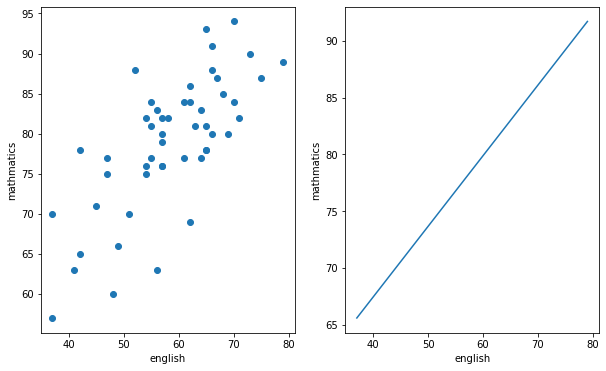

In [91]:
# 회귀직선
df = pd.read_csv('./data/ch2_scores_em.csv')
eng_scores = np.array(df.english)
math_scores = np.array(df.mathematics)
# 계수 구하기
poly_fit = np.polyfit(eng_scores,math_scores,1)
poly_1d = np.poly1d(poly_fit)
xs = np.linspace(eng_scores.min(),eng_scores.max())
ys = poly_1d(xs)

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.scatter(eng_scores,math_scores)
ax2.plot(xs,ys)
ax1.set_xlabel('english')
ax1.set_ylabel('mathmatics')
ax2.set_xlabel('english')
ax2.set_ylabel('mathmatics')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

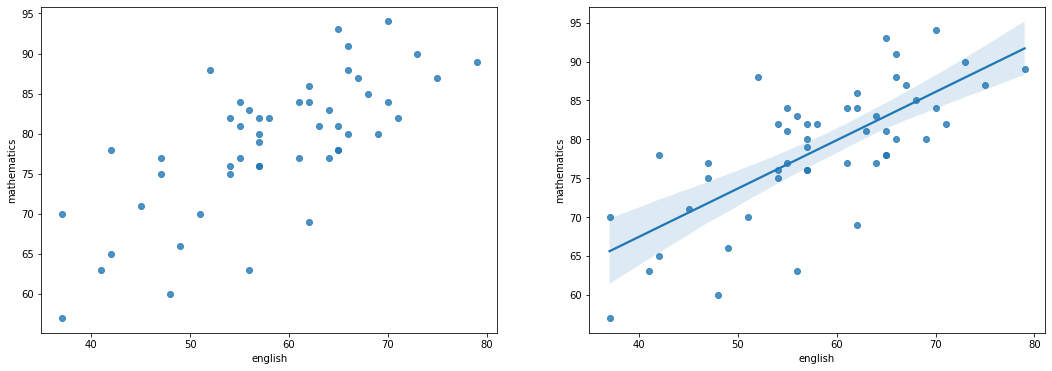

In [107]:
fig, axes = plt.subplots(1,2,figsize=(18,6),sharex=True)
sns.regplot(ax=axes[0],x=df.english,y=df.mathematics,fit_reg=False)
sns.regplot(ax=axes[1],x=df.english,y=df.mathematics)
plt.show

<AxesSubplot:xlabel='english', ylabel='mathematics'>

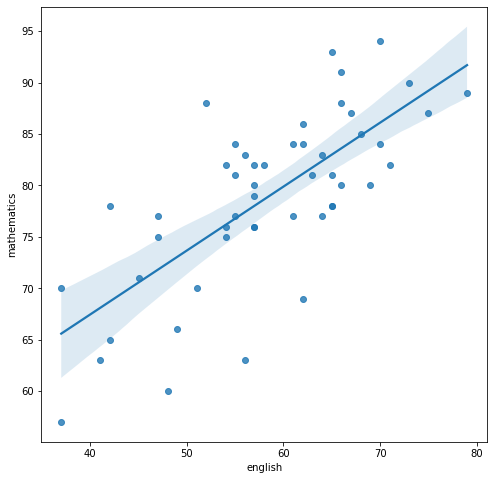

In [103]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize = (8,8))
sns.regplot('english','mathematics',df)

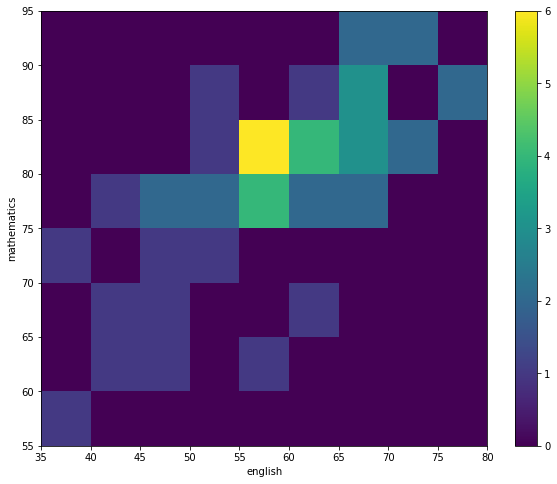

In [120]:
# hist2d 메소드로 히트맵작성
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

c = ax.hist2d(eng_scores,math_scores,
             bins = [9,8], range=[(35,80),(55,95)])
# print(c)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.set_xticks(c[1])
ax.set_yticks(c[2])
fig.colorbar(c[3],ax=ax)
plt.show()

Text(0.5, 1.0, 'Heatmap')

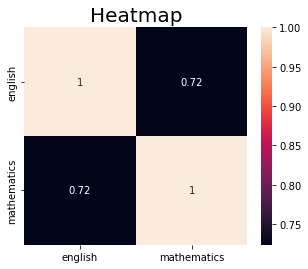

In [119]:
# Q. english와 mathematics 두 변수의 상관관계를 히트맵으로 표현하세요
plt.figure(figsize = (5,4))
sns.heatmap(df[['english','mathematics']].corr(),annot=True)
plt.title('Heatmap',fontsize=20)

In [122]:
anscombe_data = np.load('./data/ch3_anscombe.npy')
print(anscombe_data.shape)
anscombe_data[0]

(4, 11, 2)


array([[10.  ,  8.04],
       [ 8.  ,  6.95],
       [13.  ,  7.58],
       [ 9.  ,  8.81],
       [11.  ,  8.33],
       [14.  ,  9.96],
       [ 6.  ,  7.24],
       [ 4.  ,  4.26],
       [12.  , 10.84],
       [ 7.  ,  4.82],
       [ 5.  ,  5.68]])

In [129]:
stats_df = pd.DataFrame(index = ['X_mean','X_variance','Y_mean','Y_variance','X&Y_correlation','X&Y_regression line'])
for i, data in enumerate(anscombe_data):
    dataX = data[:,0]
    dataY = data[:,1]
    poly_fit = np.polyfit(dataX, dataY,1)
    stats_df[f'data{i+1}']= [f'{np.mean(dataX):.2f}',
                             f'{np.var(dataX):.2f}',
                             f'{np.mean(dataY):.2f}',
                             f'{np.var(dataY):.2f}',
                             f'{np.corrcoef(dataX,dataY)[0,1]:.2f}',
                             f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x']
stats_df

,data1,data2,data3,data4
X_mean,9.00,9.00,9.00,9.00
X_variance,10.00,10.00,10.00,10.00
Y_mean,7.50,7.50,7.50,7.50
Y_variance,3.75,3.75,3.75,3.75
X&Y_correlation,0.82,0.82,0.82,0.82
X&Y_regression line,3.00+0.50x,3.00+0.50x,3.00+0.50x,3.00+0.50x


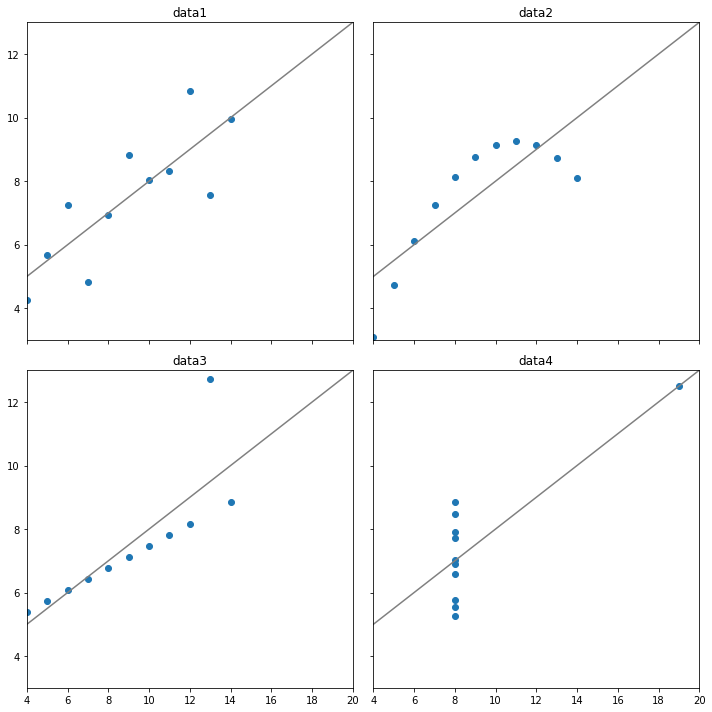

In [134]:
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(10,10),
                        sharex=True,sharey=True)

xs = np.linspace(0,30,100)
for i, data in enumerate(anscombe_data):
    poly_fit = np.polyfit(data[:,0],data[:,1],1)
    poly_1d = np.poly1d(poly_fit)
    ys = poly_1d(xs)
    
    ax = axes[i//2,i%2]
    ax.set_xlim([4,20])
    ax.set_ylim([3,13])
    
    ax.set_title(f'data{i+1}')
    ax.scatter(data[:,0],data[:,1])
    ax.plot(xs,ys,color='gray')

plt.tight_layout()
plt.show()

In [76]:
fdf = pd.read_csv('./data/5_2_fm.csv')
fdf

,species,length
0,A,2
1,A,3
2,A,4
3,B,6
4,B,8
5,B,10


In [78]:
# Q. species 그룹별 통계량을 구하세요
fdf.groupby('species').describe()

length                                    
         count mean  std  min  25%  50%  75%   max
species                                           
A          3.0  3.0  1.0  2.0  2.5  3.0  3.5   4.0
B          3.0  8.0  2.0  6.0  7.0  8.0  9.0  10.0

In [79]:
sdf = pd.read_csv('./data/5_2_shoes.csv')
sdf

,store,color,sales
0,tokyo,blue,10
1,tokyo,red,15
2,osaka,blue,13
3,osaka,red,9


In [137]:
# Q. 각 store의 컬러별 판매량을 파악할 수 있는 피복 테이블을 작성하세요.
pdf = pd.pivot_table(sdf,index = ['store','color'],
                     values = ['sales'])        
pdf

sales
store color       
osaka blue      13
      red        9
tokyo blue      10
      red       15

In [80]:
cdf = pd.read_csv('./data/4_cov.csv')
cdf

,x,y
0,18.5,34
1,18.7,39
2,19.1,41
3,19.7,38
4,21.5,45
5,21.7,41
6,21.8,52
7,22.0,44
8,23.4,44
9,23.8,49


In [145]:
# Q. x, y 의 공분산을 수하세요.
np.cov(cdf.x,cdf.y,ddof = 1)[0,1]/(np.std(cdf.x)*np.std(cdf.y))

0.8436354490152318

In [141]:
# Q. 상관행렬을 구하세요.
cdf.corr()

,x,y
x,1.000000,0.759272
y,0.759272,1.000000
